# Matching Pursuit

1D, normalized, fast

Import

In [45]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from skimage import draw
from scipy import signal
from PIL import Image
import pywt
import pywt.data
from utils_wavelet import *
import scipy.stats as stats 

Functions

In [46]:
def fun_conv(A,B):
    conv = signal.fftconvolve(A,B,mode='same')
    return conv

def naive_conv(A,B):
    C = np.zeros(len(A))
    for i in range(len(A)):
        C[i] = np.sum(A*np.roll(np.roll(np.flip(B),1),i))
    return C

def manual_conv(A,B):
    C = np.zeros(len(A))
    for m in range(len(A)):
        for i in range(len(B)):
            C[m] += A[i]*B[m-i]
    return C

def fun_auto(A):
    auto = signal.fftconvolve(A,np.flip(A),mode='same')
    return auto

def imshowArray(arr):
    plt.imshow((arr,arr))
    plt.ylim([0,1])

def npArray2arrayList(a_vector):
    fake_x_vector = np.ones(len(a_vector))
    fake_a_coef = pywt.wavedec(fake_x_vector,'db1')
    a_vector_array = vec2arrayList(a_vector,fake_a_coef)
    return a_vector_array

Sparse vector a

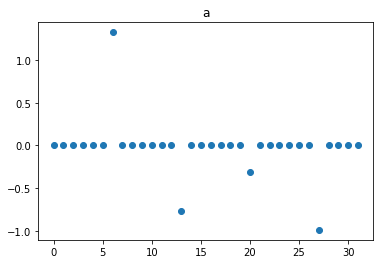

In [47]:
#defining vector a
np.random.seed(24)
a_values = np.random.normal(0, 1, 4)
d = 32
a_real = np.zeros(d)
for a_val in range(len(a_values)):
    a_real[6+7*a_val] = a_values[a_val]

plt.plot(a_real,'o')
plt.title('a')
plt.show()

PSF vector h

In [48]:
# h_x = np.linspace(-d*2,d*2,d)

# h_sig=1
# h = np.exp(-h_x**2/(2*h_sig**2))

# h = np.fft.fftshift(h)
# h /= np.linalg.norm(h)

# # h -= h.mean()

# plt.figure(figsize=(15,3))

# plt.subplot(1,3,1)
# imshowArray(h)
# plt.title('h')

# plt.subplot(1,3,2)
# plt.plot(h)
# plt.title('h')

# plt.subplot(1,3,3)
# plt.plot(fun_auto(h))
# plt.title('autocorrelation of h')

# plt.show()


In [49]:
# h_x = np.linspace(-d*5,d*5,d-1)

# h_sig=6
# h = np.exp(-h_x**2/(2*h_sig**2))
# h = np.append(h,0)

# # h = np.fft.fftshift(h)
# # h /= np.linalg.norm(h)
# h /= np.sum(h)

# print(np.sum(h))
# # h -= h.mean()

# plt.figure(figsize=(15,3))

# plt.subplot(1,3,1)
# imshowArray(h)
# plt.title('h')

# plt.subplot(1,3,2)
# plt.plot(h)
# plt.title('h')

# plt.subplot(1,3,3)
# plt.plot(fun_auto(h))
# plt.title('autocorrelation of h')

# plt.show()


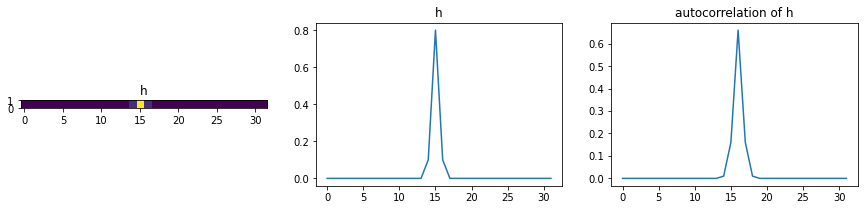

In [50]:
h = np.zeros(d)
h[14] = 0.1
h[15] = 0.8
h[16] = 0.1
# h[1] = 0.2
# h *=0.8
# h = np.random.randn(d)

# h /= np.sum(h)
# h -= h.mean()

plt.figure(figsize=(15,3))

plt.subplot(1,3,1)
imshowArray(h)
plt.title('h')

plt.subplot(1,3,2)
plt.plot(h)
plt.title('h')

plt.subplot(1,3,3)
plt.plot(fun_auto(h))
plt.title('autocorrelation of h')

plt.show()


Offline computation

In [51]:
# fake_x_vector = np.array(np.ones(1596)) #so the length of a is DxD (40x40 = 1680)
# fake_a_coef = pywt.wavedec(fake_x_vector,'db1')

# id_vector = np.eye(d).flatten()
# id_array = vec2arrayList(id_vector,fake_a_coef)
# psi_matrix = pywt.waverec(id_array,'db1')
# theta_matrix = fun_conv(h,psi_matrix)

# weight_array = np.zeros(d)
# for i in range(d):
#     weight_i = 1/np.linalg.norm(theta_matrix[:,i])
#     weight_array[i] = weight_i

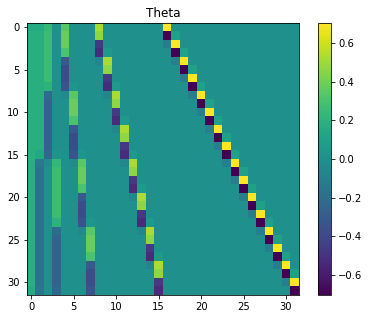

In [52]:
#Offline computation
Theta = np.zeros((d,d))
weight_array = np.zeros(d)

fake_x_vector = np.ones(32)
fake_a_coef = pywt.wavedec(fake_x_vector,'db1')

for a_ii in range(d):
    #step 0
    e_vector = np.zeros(d,dtype=float)
    e_vector[a_ii] = 1
    #step 1
    e_array = vec2arrayList(e_vector,fake_a_coef)
    phi_i = pywt.waverec(e_array,'db1')
    #step 2
    # theta_i = signal.fftconvolve(h,phi_i,mode='same')
    theta_i = fun_conv(h,phi_i)
    Theta[:,a_ii] = theta_i/np.linalg.norm(theta_i)
    # # Theta[:,i] = theta_i
    # #step 3
    weight_i = 1/np.linalg.norm(theta_i)
    weight_array[a_ii] = weight_i

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.imshow(Theta)
plt.colorbar()
plt.title('Theta')

# plt.subplot(1,2,2)
# imshowArray(weight_array)
# plt.title('weights array')

plt.show()


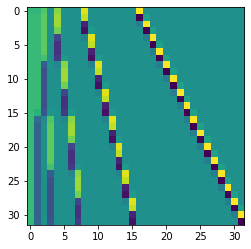

In [53]:
new_matrix = np.zeros((d,d))
new_weights = np.zeros(d)
for i in range(d):
    e = np.zeros(d)
    e[i] = 1
    new_matrix[:,i] = fun_conv(h,pywt.waverec(npArray2arrayList(e),'db1'))
    new_weights[i] = 1/np.linalg.norm(new_matrix[:,i])

plt.figure()
plt.imshow(new_matrix)
plt.show()

In [54]:
# test = np.zeros(32)
# test[3] = 1
# e_array = vec2arrayList(test,fake_a_coef)
# phi_i = pywt.waverec(e_array,'db1')

# plt.figure()
# # plt.plot(Theta[:,0])
# plt.plot(phi_i)
# plt.show()

Output vector x

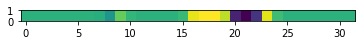

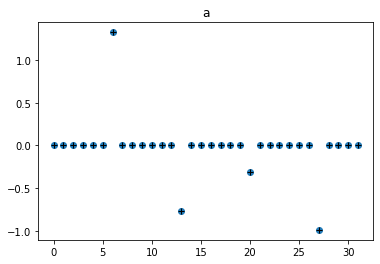

In [55]:
fake_x_vector = np.ones(32)
fake_a_coef = pywt.wavedec(fake_x_vector,'db1')
a_real_array = vec2arrayList(a_real,fake_a_coef)

x = pywt.waverec(a_real_array,'db1')
y = fun_conv(h,x)
# y = manual_conv(x,h)

imshowArray(y)
plt.show()

a_recover_array = pywt.wavedec(x,'db1')
a_recover_vector = arrayList2vec(a_recover_array)
plt.plot(a_real,'o')
plt.plot(a_recover_vector,'k+')
plt.title('a')
plt.show()

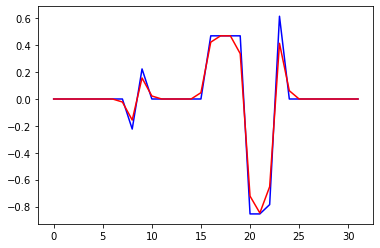

32
32
32


In [56]:
# y = manual_conv(x,h)
# y = fun_conv(x,h)
y = fun_conv(h,x)

plt.figure()
plt.plot(x, 'b')
plt.plot(y, 'r')
plt.show()

print(len(x))
print(len(h))
print(len(y))

MP loop

c = 1.2525067669630439
<r(k+1),Θ(i*)> = 0.0, ans: -3.469246400090562e-16
k ← 1
c = -0.7241683317113361
<r(k+1),Θ(i*)> = 0.0, ans: 1.6141205042862584e-16
k ← 2
c = -0.6934159599549069
<r(k+1),Θ(i*)> = 0.0, ans: 5.412525760892309e-17
k ← 3
c = -0.22364398704443292
<r(k+1),Θ(i*)> = 0.0, ans: 2.105157884990704e-17
k ← 4


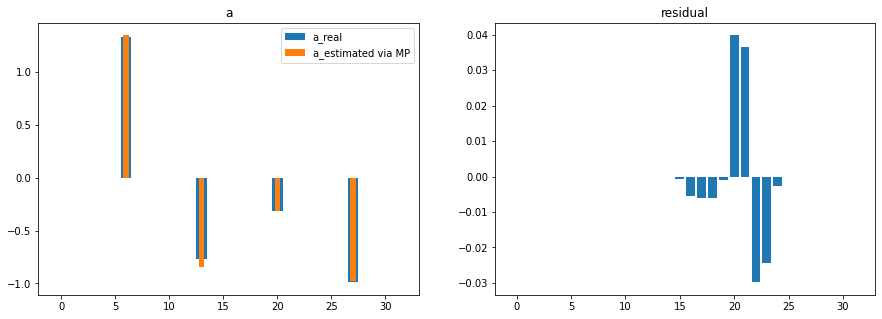

In [82]:
r = np.copy(y)
a = np.zeros(len(a_real))
k = 0
s = 4
plotting_product = np.array([])
plotting_residue = np.array([])

while (k<s):
    #atom selection
    Hr = fun_conv(h,r)
    YTHr = arrayList2vec(pywt.wavedec(Hr,'db1'))
    i_star = np.argmax(abs(YTHr))

    e = np.zeros(d)
    e[i_star] = 1
    psi_i_star = pywt.waverec(npArray2arrayList(e),'db1')
    theta_i_star = fun_conv(h,psi_i_star)
    theta_norm = np.linalg.norm(theta_i_star)
    c = np.sum(theta_i_star*r)/theta_norm
    print('c =',c)

    #coef. update
    a[i_star] = c

    #residual update
    r -= c*theta_i_star/theta_norm
    print('<r(k+1),Θ(i*)> = 0.0, ans:',np.sum(r*theta_i_star)/theta_norm)

    #plotting elements
    plotting_product = np.append(plotting_product,c)
    plotting_residue = np.append(plotting_residue,np.linalg.norm(r))

    k += 1
    print('k ←',k)

a *= weight_array   

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(range(d), a_real, width=1, label='a_real')
plt.bar(range(d), a, width=0.5, label='a_estimated via MP')
plt.title('a')
plt.legend()
plt.subplot(1,2,2)
plt.bar(range(d),r)
plt.title('residual')
plt.show()

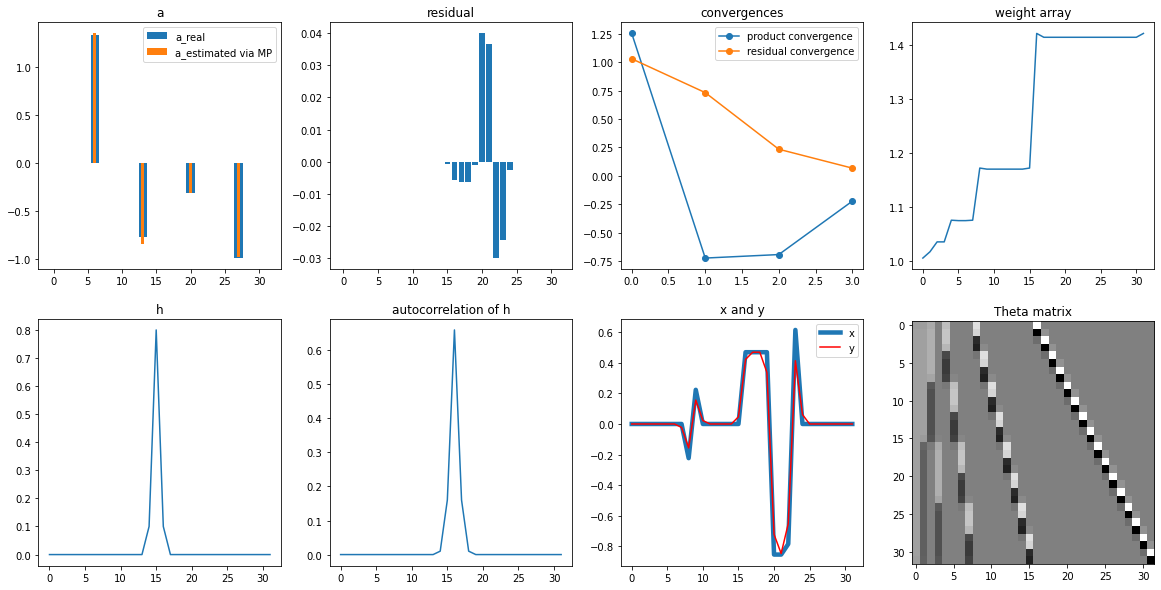

In [80]:
fig = plt.figure(figsize=(20,10))

fig.add_subplot(2, 4, 1)
plt.bar(range(d), a_real, width=1.2, label='a_real')
plt.bar(range(d), a, width=0.4, label='a_estimated via MP')
plt.title('a')
plt.legend()

fig.add_subplot(2, 4, 2)
plt.bar(range(d),r)
plt.title('residual')

fig.add_subplot(2, 4, 3)
plt.plot(plotting_product,'o-',label='product convergence')
plt.plot(plotting_residue,'o-',label='residual convergence')
plt.legend()
plt.title('convergences')

fig.add_subplot(2, 4, 4)
plt.plot(weight_array)
plt.title('weight array')

fig.add_subplot(2, 4, 5)
plt.plot(h)
plt.title('h')

fig.add_subplot(2, 4, 6)
plt.plot(fun_auto(h))
plt.title('autocorrelation of h')

# fig.add_subplot(2, 4, 7)
# plt.plot(x,label='x')
# plt.plot(y,'r',label='y',linestyle = (0,(10,10)))
# plt.legend()
# plt.title('x and y')

fig.add_subplot(2, 4, 7)
plt.plot(x,label='x',linewidth=4.5)
plt.plot(y,'r',label='y',linewidth=1.5)
plt.legend()
plt.title('x and y')

fig.add_subplot(2, 4, 8)
plt.imshow(Theta, cmap='gray')
plt.title('Theta matrix')

# plt.savefig('resultats/mp_1d1.png', bbox_inches='tight')
plt.show()

In [62]:
print(a)
print(weight_array)

[ 0.          0.          0.          0.          0.          0.
  1.25250677  0.          0.          0.          0.          0.
  0.         -0.72416833  0.          0.          0.          0.
  0.          0.         -0.22364399  0.          0.          0.
  0.          0.          0.         -0.69341596  0.          0.
  0.          0.        ]
[1.00599091 1.0176437  1.03590796 1.03590796 1.07598439 1.07520666
 1.07520666 1.07598439 1.17242076 1.17041147 1.17041147 1.17041147
 1.17041147 1.17041147 1.17041147 1.17242076 1.42133811 1.41421356
 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
 1.41421356 1.42133811]
